(859, 1144)


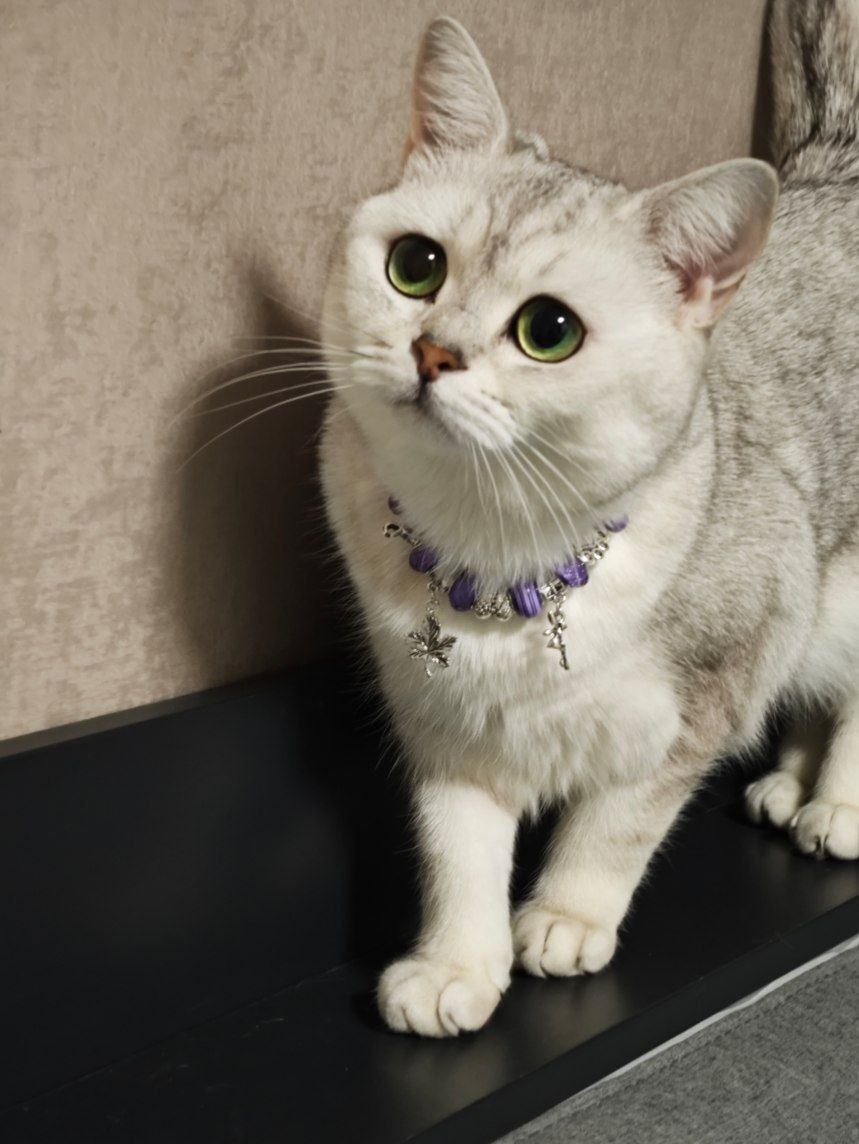

In [28]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image

image = Image.open('qian.jpg')
print(image.size)
image

In [32]:
processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
# processor
model = AutoModelForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [25]:
def inference(inputs):
    outputs = model(**inputs)
    logits = outputs.logits # torch.Size([1, 1000])
    print("max=",logits.max(-1).values.item(), ", mean=",logits.mean(-1).item())
    predicted_class_idx = logits.argmax(-1).item()
    print("Predicted class:", model.config.id2label[predicted_class_idx])

In [29]:
inputs = processor(images=image, return_tensors="pt") # torch.Size([1, 3, 224, 224])
inference(inputs)

max= 9.424065589904785 , mean= -0.01643543876707554
Predicted class: Egyptian cat


In [91]:
# resize image
image2 = image.resize((224, 224))
# add gaussian noise
import numpy as np
image2 = np.array(image2)
noise = np.random.normal(0, 0, image2.shape)
image2 = image2 + noise
image2 = Image.fromarray(image2.astype('uint8'))

# gaussian blur
from PIL import ImageFilter
image2 = image2.filter(ImageFilter.GaussianBlur(radius=4))

image2

inputs2 = processor(images=image2, return_tensors="pt")
inference(inputs2)


max= 5.671370983123779 , mean= -0.021797088906168938
Predicted class: langur


In [60]:
image3 = image.resize((224, 224))

# crop top half
image3 = image3.crop((0, 0, 224, 224))
image3

inputs3 = processor(images=image3, return_tensors="pt")
inference(inputs3)

max= 9.424065589904785 , mean= -0.01643543876707554
Predicted class: Egyptian cat


In [124]:
import datasets

# load imagenet-1k test set from local tar.gz
data_path = '/home/gyc/datasets/imagenet-tiny'
dataset = datasets.load_dataset('imagefolder', data_dir=data_path)

Resolving data files:   0%|          | 0/1999 [00:00<?, ?it/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [125]:
dataset['validation'][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
 'label': 65,
 'class_idx': 'n01751748',
 'class_name': 'sea snake'}

In [126]:
image_data = dataset['validation'][0]['image']

inputs = processor(images=image_data, return_tensors="pt") # torch.Size([1, 3, 224, 224])
inference(inputs)

max= 10.668045997619629 , mean= 0.010313209146261215
Predicted class: sea snake


In [ ]:
# from classes import IMAGENET2012_CLASSES

# # load imagenet-1k test set from local dir
# data_path = '/home/gyc/datasets/imagenet-tiny/val'

# import csv
# import os

# all_class_to_num = {class_name: i for i, class_name in enumerate(IMAGENET2012_CLASSES)}

# with open(data_path + '/metadata.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerow(['file_name', 'label', 'class_idx', 'class_name'])
#     for file_name in sorted(os.listdir(data_path)):
#         if not file_name.endswith('.JPEG'):
#             continue

#         class_idx = file_name.split('_')[3].split('.')[0]
#         class_name = IMAGENET2012_CLASSES[class_idx]
#         class_number = all_class_to_num[class_idx]
#         writer.writerow([file_name, class_number, class_idx, class_name])
